In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score


In [14]:

columns = ['Sex', 'Length', 'Diameter', 'Height', 
           'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

df = pd.read_csv('abalone.csv', names=columns, header=None)


df['Sex_F'] = (df['Sex'] == 'F').astype(int)
df['Sex_I'] = (df['Sex'] == 'I').astype(int)
df['Sex_M'] = (df['Sex'] == 'M').astype(int)


df = df.drop('Sex', axis=1)


df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [22]:
df['Rings'] = df['Rings'].replace('3+', 3)
df['Rings'] = pd.to_numeric(df['Rings'], errors='coerce')


In [23]:
df.isnull().sum()


Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

In [24]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex_F           4177 non-null   int32  
 9   Sex_I           4177 non-null   int32  
 10  Sex_M           4177 non-null   int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 310.1 KB


In [18]:
df.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


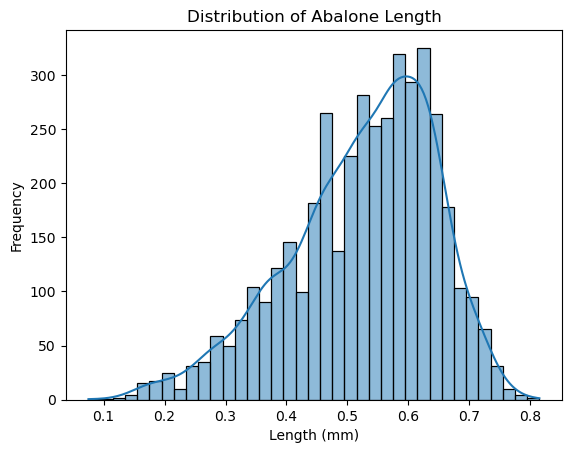

In [19]:
sns.histplot(df['Length'], kde=True)
plt.title('Distribution of Abalone Length')
plt.xlabel('Length (mm)')
plt.ylabel('Frequency')
plt.show()


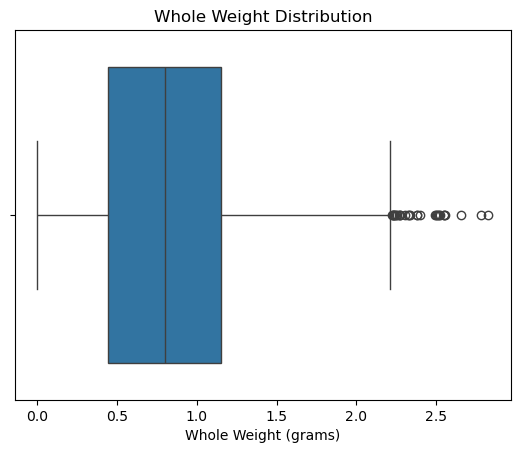

In [20]:
sns.boxplot(x=df['Whole weight'])
plt.title('Whole Weight Distribution')
plt.xlabel('Whole Weight (grams)')
plt.show()


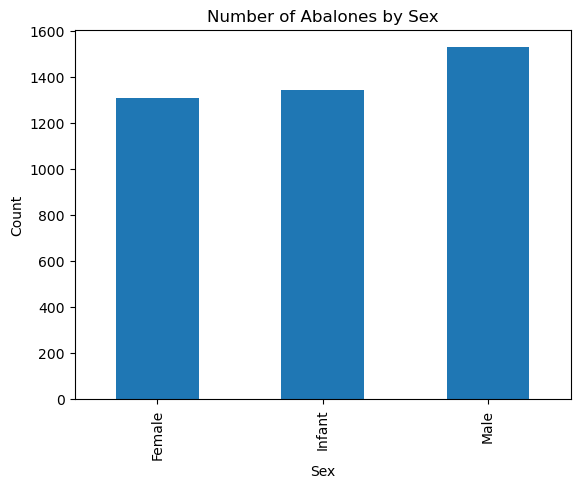

In [21]:
sex_counts = df[['Sex_F', 'Sex_I', 'Sex_M']].sum()

sex_counts.plot(kind='bar')
plt.title('Number of Abalones by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2], labels=['Female', 'Infant', 'Male'])
plt.show()


In [25]:
X = df.drop('Rings', axis=1)
y = df['Rings']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
y_pred_rings = model.predict(X_test)


In [29]:
y_pred_age = y_pred_rings + 1.5

In [30]:
mse = mean_squared_error(y_test + 1.5, y_pred_age)  # Add 1.5 to y_test too
r2 = r2_score(y_test + 1.5, y_pred_age)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 4.799312901839115
R2 Score: 0.5273735025461574


In [31]:
kf = KFold(n_splits=10)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean Cross-Validation MSE:", -cv_scores.mean())


Cross-Validation MSE Scores: [ 6.69689708 11.51328237  2.92174008  2.72514738  4.10438875  8.37808076
  2.45023505  5.1889159   3.59411182  4.25612491]
Mean Cross-Validation MSE: 5.182892409869893


In [32]:
new_data = pd.DataFrame({
    'Length': [0.5, 0.45],
    'Diameter': [0.4, 0.35],
    'Height': [0.15, 0.12],
    'Whole weight': [0.8, 0.75],
    'Shucked weight': [0.35, 0.3],
    'Viscera weight': [0.2, 0.18],
    'Shell weight': [0.25, 0.22],
    'Sex_F': [1, 0],
    'Sex_I': [0, 1],
    'Sex_M': [0, 0]
})


new_predictions_rings = model.predict(new_data)


new_predictions_age = new_predictions_rings + 1.5

print("Predicted Age Estimates:", new_predictions_age)


Predicted Age Estimates: [11.359375 10.484375]
